#Import data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/AllKPI_Analysis.xlsx')
df

,Faculty,PROGRAMID,PROGRAMNAMECERTIFY,ปีที่เปิดหลักสูตร,LUR2562,LUR2563,LUR2564,LUR2565,LUR2566,LUR2567,...,Graduation Rate2564,On-time_Graduation_Rate2562,On-time_Graduation_Rate2563,On-time_Graduation_Rate2564,Dropout Rate 2562,Dropout Rate 2563,Dropout Rate 2564,Dropout Rate 2565,Dropout Rate 2566,Dropout Rate 2567
0,คณะทันตแพทย์ศาสตร์,1301,หลักสูตรทันตแพทยศาสตรบัณฑิต ( 6 ปี ),2562,0.866667,0.966667,1.000000,1.016667,1.000000,0.966667,...,NaN,NaN,NaN,NaN,0.061224,0.035714,0.034483,0.078431,0.017241,0.017241
1,คณะนิติศาสตร์,1601,หลักสูตรนิติศาสตรบัณฑิต ( 4 ปี ),2562,1.425000,1.583333,1.841667,1.354167,1.445833,1.704167,...,0.445813,0.773333,0.803191,1.0,0.062731,0.086957,0.105911,0.136364,0.136808,0.039120
2,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1802,หลักสูตรบริหารธุรกิจบัณฑิต สาขาวิชาบริหารธุรกิ...,2562,1.280000,1.450000,1.250000,0.916667,0.916667,0.816667,...,0.884956,0.900826,0.992188,1.0,0.049180,0.067164,0.150442,0.077670,0.037383,0.051020
3,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1804,หลักสูตรบัญชีบัณฑิต ( 4 ปี ),2562,1.050000,1.440000,1.050000,1.287500,1.300000,0.862500,...,0.840000,0.881188,0.905512,1.0,0.029412,0.043165,0.050000,0.040404,0.041667,0.043478
4,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1806,หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาการท่องเที่ยว ...,2562,0.950000,1.000000,1.012500,0.950000,0.962500,0.950000,...,NaN,0.955224,0.894737,0.0,0.054795,0.239437,0.105263,0.069444,0.056338,0.065789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,คณะวิทยาศาสตร์,616,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาเทคโนโลยีนวัต...,2565,0.000000,0.000000,0.000000,0.533333,1.766667,2.433333,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89,คณะวิทยาศาสตร์,617,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาเทคโนโลยีการว...,2565,0.000000,0.000000,0.000000,0.383333,0.433333,0.233333,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.153846,0.276596,0.041096
90,คณะวิศวกรรมศาสตร์,710,หลักสูตรวิศวกรรมศาสตรบัณฑิต สาขาวิชาวิศวกรรมนว...,2565,0.000000,0.000000,0.000000,0.175000,0.650000,0.475000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.375000,0.333333,0.142857
91,คณะโลจิสติกส์ดิจิทัลและซัพพลายเชน,2302,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาโลจิสติกส์และ...,2566,0.000000,0.000000,0.000000,0.000000,0.200000,0.275000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.142857,0.187500,0.105263


In [ ]:
!pip install tabulate

#stat

In [ ]:
selected_columns = df.iloc[:, 4:]
selected_columns.describe().style.set_caption("stat of each KPI").format(precision=3).background_gradient(cmap='YlGnBu')

,LUR2562,LUR2563,LUR2564,LUR2565,LUR2566,LUR2567,Retention_Rate2562,Retention_Rate2563,Retention_Rate2564,Retention_Rate2565,Retention_Rate2566,Growth_Rate2563,Growth_Rate2564,Growth_Rate2565,Growth_Rate2566,Growth_Rate2567,Graduation Rate2562,Graduation Rate2563,Graduation Rate2564,On-time_Graduation_Rate2562,On-time_Graduation_Rate2563,On-time_Graduation_Rate2564,Dropout Rate 2562,Dropout Rate 2563,Dropout Rate 2564,Dropout Rate 2565,Dropout Rate 2566,Dropout Rate 2567
count,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,93.000,90.000,87.000,81.000,90.000,87.000,92.000,93.000,93.000,93.000,93.000,93.000,93.000
mean,1.060,1.090,1.084,0.946,0.983,0.908,0.774,0.765,0.756,0.835,0.820,0.043,0.022,-0.072,0.149,-0.015,0.756,0.724,0.795,0.768,0.809,0.771,0.127,0.148,0.206,0.166,0.147,0.059
std,0.649,0.652,0.622,0.492,0.390,0.537,0.348,0.319,0.316,0.230,0.205,0.270,0.324,0.369,0.574,0.604,0.343,0.295,1.649,0.333,0.311,0.422,0.160,0.184,0.347,0.197,0.149,0.056
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-0.862,-0.647,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.867,0.820,0.850,0.644,0.867,0.750,0.733,0.742,0.675,0.765,0.750,-0.078,-0.136,-0.218,-0.073,-0.190,0.713,0.646,0.412,0.766,0.819,0.998,0.025,0.036,0.073,0.040,0.036,0.019
50%,1.065,1.050,1.012,1.000,1.017,0.925,0.882,0.853,0.820,0.852,0.857,0.000,0.000,-0.068,0.000,-0.059,0.871,0.812,0.697,0.917,0.940,1.000,0.075,0.098,0.121,0.103,0.103,0.046
75%,1.325,1.450,1.375,1.163,1.150,1.133,0.952,0.935,0.901,0.960,0.932,0.133,0.071,0.000,0.154,0.108,0.944,0.918,0.860,0.977,0.988,1.000,0.172,0.185,0.256,0.228,0.213,0.087
max,3.350,3.950,3.567,2.683,2.100,2.433,1.800,1.560,2.286,1.981,1.745,1.400,2.083,2.750,2.714,4.000,1.667,1.065,15.200,1.000,1.000,1.000,1.049,1.085,3.000,1.154,0.833,0.265


## Histogram

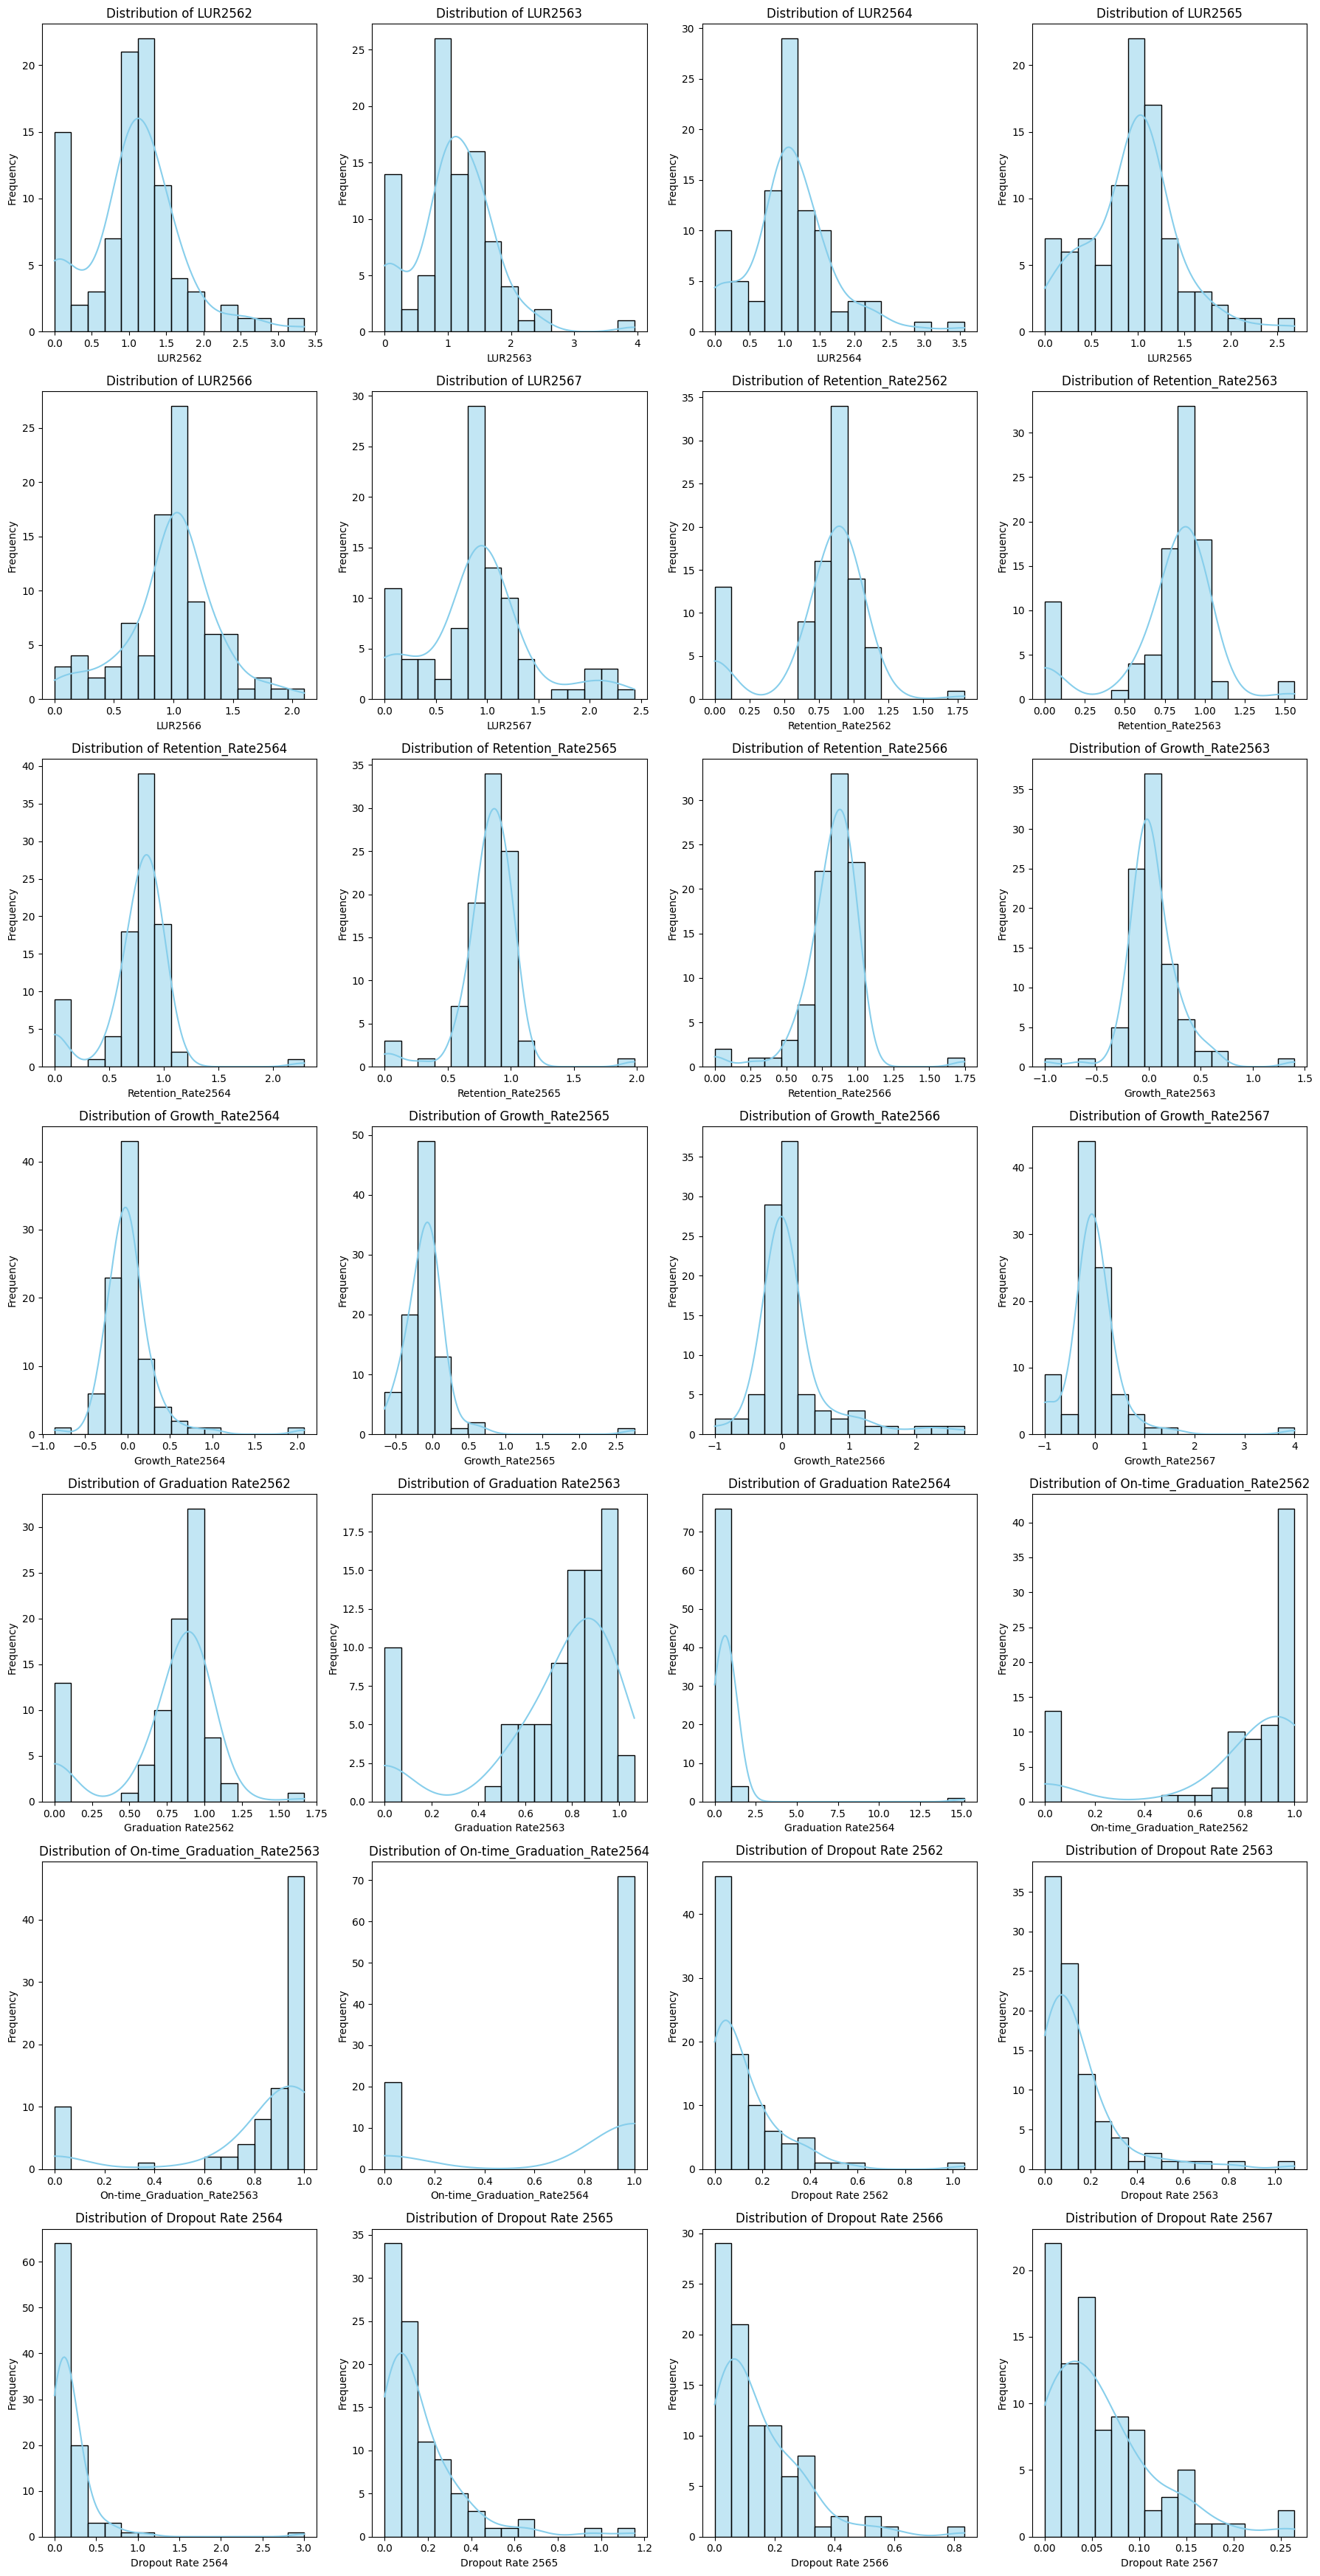

In [ ]:
kpi_df = df.iloc[:, 4:]

# ตั้งค่าขนาดกราฟรวม
num_cols = len(kpi_df.columns)
num_rows = (num_cols + 2) // 4

plt.figure(figsize=(18, 5 * num_rows))

# วนลูปวาด histogram แต่ละ KPI
for i, col in enumerate(kpi_df.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(kpi_df[col], kde=True, bins=15, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# เลือกเฉพาะคอลัมน์ KPI (คอลัมน์ที่ 5 ถึง 26)
kpi_columns = df.columns[4:]
df_kpi = df[["PROGRAMNAMECERTIFY"] + list(kpi_columns)].copy()

# ทำ Min-Max Scaling เฉพาะคอลัมน์ KPI
scaler = MinMaxScaler()
df_kpi_scaled = df_kpi.copy()
df_kpi_scaled[kpi_columns] = scaler.fit_transform(df_kpi[kpi_columns])

# ตรวจสอบผลลัพธ์หลัง normalization
print(df_kpi_scaled.head())


                                  PROGRAMNAMECERTIFY   LUR2562   LUR2563  \
0              หลักสูตรทันตแพทยศาสตรบัณฑิต ( 6 ปี  )  0.258706  0.244726   
1                  หลักสูตรนิติศาสตรบัณฑิต ( 4 ปี  )  0.425373  0.400844   
2  หลักสูตรบริหารธุรกิจบัณฑิต สาขาวิชาบริหารธุรกิ...  0.382090  0.367089   
3                      หลักสูตรบัญชีบัณฑิต ( 4 ปี  )  0.313433  0.364557   
4  หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาการท่องเที่ยว ...  0.283582  0.253165   

    LUR2564   LUR2565   LUR2566   LUR2567  Retention_Rate2562  \
0  0.280374  0.378882  0.476190  0.397260            0.523504   
1  0.516355  0.504658  0.688492  0.700342            0.497076   
2  0.350467  0.341615  0.436508  0.335616            0.533854   
3  0.294393  0.479814  0.619048  0.354452            0.550265   
4  0.283879  0.354037  0.458333  0.390411            0.519006   

   Retention_Rate2563  Retention_Rate2564  ...  Graduation Rate2564  \
0            0.596817            0.415625  ...                  NaN   
1         

##Correlation

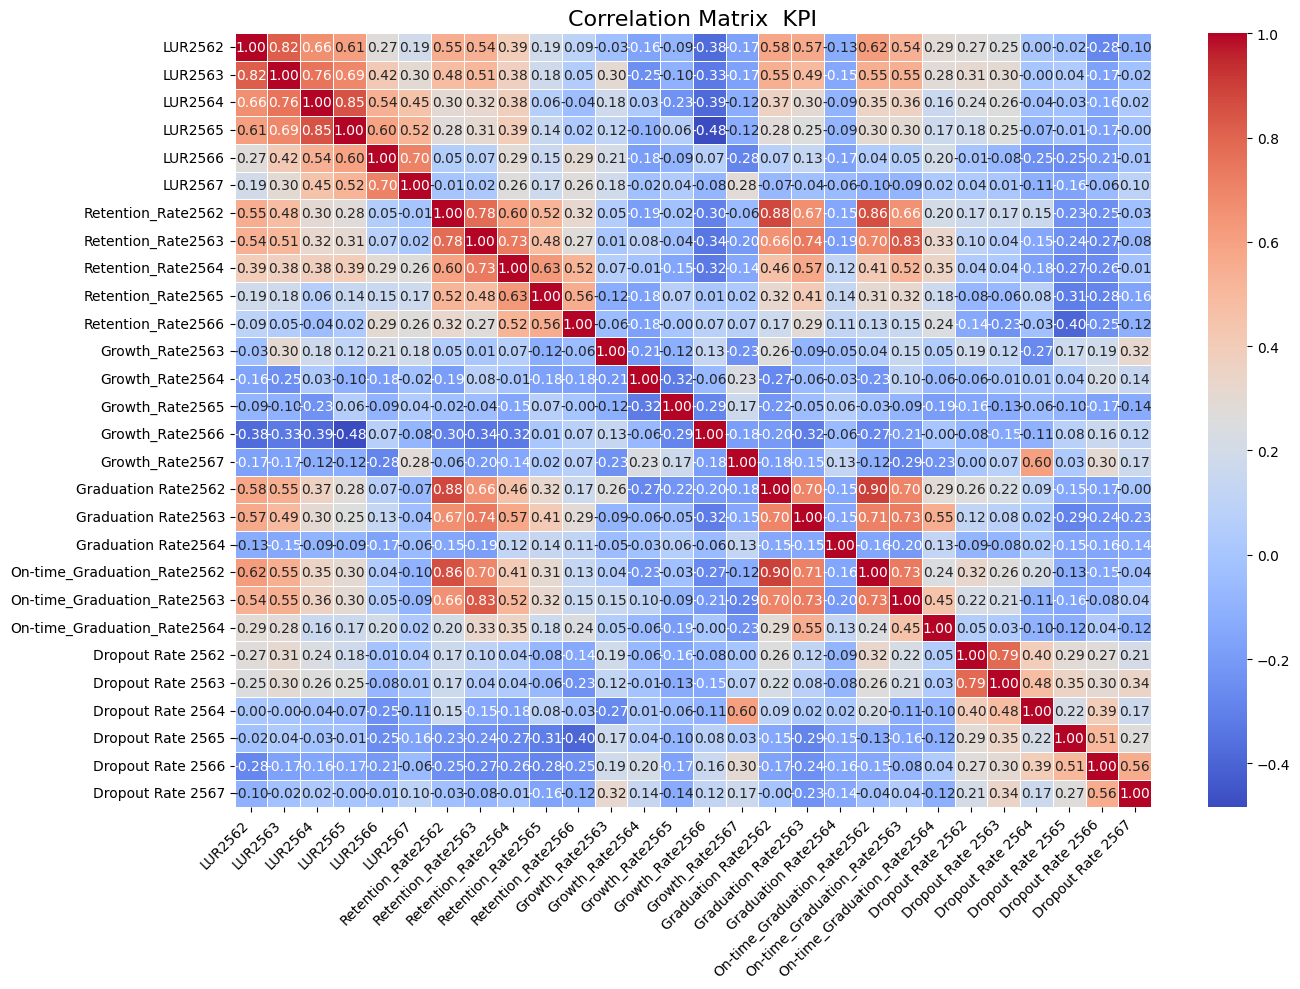

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame เฉพาะคอลัมน์ KPI
df_kpi_scaled = df.columns[4:]
df_kpi_only = df[df_kpi_scaled]

# คำนวณ Correlation Matrix
corr_matrix = df_kpi_only.corr()

# วาด heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix  KPI", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Percentile

In [ ]:
import pandas as pd
from scipy.stats import percentileofscore

# ระบุ KPI ที่ต้องใช้
kpi_positive = [
    'LUR2562', 'LUR2563', 'LUR2564', 'LUR2565', 'LUR2566', 'LUR2567',
    'Growth_Rate2563', 'Growth_Rate2564', 'Growth_Rate2565', 'Growth_Rate2566', 'Growth_Rate2567',
    'Retention_Rate2562', 'Retention_Rate2563', 'Retention_Rate2564', 'Retention_Rate2565', 'Retention_Rate2566',
    'Graduation Rate2562', 'Graduation Rate2563', 'Graduation Rate2564',
    'On-time_Graduation_Rate2562', 'On-time_Graduation_Rate2563', 'On-time_Graduation_Rate2564'
]

kpi_negative = [
    'Dropout Rate 2562', 'Dropout Rate 2563', 'Dropout Rate 2564',
    'Dropout Rate 2565', 'Dropout Rate 2566', 'Dropout Rate 2567'
]

# ฟังก์ชันคำนวณ percentile
def compute_percentile(series, reverse=False):
    return series.apply(lambda x: 100 - percentileofscore(series, x) if reverse else percentileofscore(series, x))

# แทน NaN ด้วยค่าเฉลี่ยของแต่ละคอลัมน์ก่อนการคำนวณ percentile
for col in kpi_positive + kpi_negative:
    df[col] = df[col].fillna(df[col].mean())

# คำนวณ percentile สำหรับแต่ละคอลัมน์
for col in kpi_positive:
    df[f'P_{col}'] = compute_percentile(df[col])

for col in kpi_negative:
    df[f'P_{col}'] = compute_percentile(df[col], reverse=True)

# รวมคะแนนทุก KPI เป็น Total Score
percentile_cols = [col for col in df.columns if col.startswith('P_')]
df['Total_Score'] = df[percentile_cols].mean(axis=1)


df['Rank'] = df['Total_Score'].rank(ascending=False)


result = df[['Faculty', 'PROGRAMNAMECERTIFY', 'Total_Score', 'Rank']].sort_values(by='Total_Score', ascending=False)

# แบ่งกลุ่มตาม Total Score
df["Program_Category"] = pd.qcut(df["Total_Score"], q=4, labels=["เสี่ยงควรพิจารณาปิด", "ควรปรับปรุง","ดี", "ดีเยี่ยม"])

# แสดงผลลัพธ์
print(result.head(10))


                                           Faculty  \
19                                 คณะมนุษยศาสตร์    
55                                 คณะสหเวชศาสตร์    
16                                 คณะมนุษยศาสตร์    
59                                 คณะสังคมศาสตร์    
42                                 คณะศึกษาศาสตร์    
65                             คณะสาธารณสุขศาสตร์    
29                         คณะวิทยาศาสตร์การแพทย์    
41                                 คณะศึกษาศาสตร์    
3        คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร    
69  คณะเกษตรศาสตร์ ทรัพยากรธรมมชาติและสิ่งแวดล้อม    

                                   PROGRAMNAMECERTIFY  Total_Score  Rank  
19  หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาภาษาอังกฤษ ( 4...    72.657450   1.0  
55  หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชารังสีเทคนิค (...    69.662058   2.0  
16  หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาภาษาไทย ( 4 ปี  )    67.069892   3.0  
59  หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาประวัติศาสตร์ ...    66.839478   4.0  
42  หลักสูตรการศึกษาบัณฑิต สาข

In [ ]:
df

,Faculty,PROGRAMID,PROGRAMNAMECERTIFY,ปีที่เปิดหลักสูตร,LUR2562,LUR2563,LUR2564,LUR2565,LUR2566,LUR2567,...,P_On-time_Graduation_Rate2564,P_Dropout Rate 2562,P_Dropout Rate 2563,P_Dropout Rate 2564,P_Dropout Rate 2565,P_Dropout Rate 2566,P_Dropout Rate 2567,Total_Score,Rank,Program_Category
0,คณะทันตแพทย์ศาสตร์,1301,หลักสูตรทันตแพทยศาสตรบัณฑิต ( 6 ปี ),2562,0.866667,0.966667,1.000000,1.016667,1.000000,0.966667,...,23.655914,53.763441,74.731183,81.720430,60.215054,85.483871,76.344086,55.933180,31.0,ดี
1,คณะนิติศาสตร์,1601,หลักสูตรนิติศาสตรบัณฑิต ( 4 ปี ),2562,1.425000,1.583333,1.841667,1.354167,1.445833,1.704167,...,63.440860,52.688172,54.838710,55.913978,39.247312,37.634409,59.139785,55.952381,30.0,ดี
2,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1802,หลักสูตรบริหารธุรกิจบัณฑิต สาขาวิชาบริหารธุรกิ...,2562,1.280000,1.450000,1.250000,0.916667,0.916667,0.816667,...,63.440860,59.139785,61.290323,40.860215,62.365591,73.118280,44.086022,62.653610,12.0,ดีเยี่ยม
3,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1804,หลักสูตรบัญชีบัณฑิต ( 4 ปี ),2562,1.050000,1.440000,1.050000,1.287500,1.300000,0.862500,...,63.440860,70.967742,70.967742,79.569892,74.193548,72.043011,51.075269,63.018433,9.0,ดีเยี่ยม
4,คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร,1806,หลักสูตรศิลปศาสตรบัณฑิต สาขาวิชาการท่องเที่ยว ...,2562,0.950000,1.000000,1.012500,0.950000,0.962500,0.950000,...,11.827957,56.989247,16.129032,56.989247,64.516129,67.741935,34.408602,51.747312,44.0,ดี
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,คณะวิทยาศาสตร์,616,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาเทคโนโลยีนวัต...,2565,0.000000,0.000000,0.000000,0.533333,1.766667,2.433333,...,11.827957,88.172043,91.397849,93.548387,93.548387,93.010753,89.784946,48.425499,54.0,ควรปรับปรุง
89,คณะวิทยาศาสตร์,617,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาเทคโนโลยีการว...,2565,0.000000,0.000000,0.000000,0.383333,0.433333,0.233333,...,11.827957,88.172043,91.397849,93.548387,0.000000,16.129032,55.913978,26.651306,93.0,เสี่ยงควรพิจารณาปิด
90,คณะวิศวกรรมศาสตร์,710,หลักสูตรวิศวกรรมศาสตรบัณฑิต สาขาวิชาวิศวกรรมนว...,2565,0.000000,0.000000,0.000000,0.175000,0.650000,0.475000,...,11.827957,88.172043,91.397849,93.548387,9.677419,8.064516,9.677419,27.668971,92.0,เสี่ยงควรพิจารณาปิด
91,คณะโลจิสติกส์ดิจิทัลและซัพพลายเชน,2302,หลักสูตรวิทยาศาสตรบัณฑิต สาขาวิชาโลจิสติกส์และ...,2566,0.000000,0.000000,0.000000,0.000000,0.200000,0.275000,...,11.827957,88.172043,91.397849,93.548387,37.634409,32.258065,16.129032,29.934716,88.0,เสี่ยงควรพิจารณาปิด


#K-Means

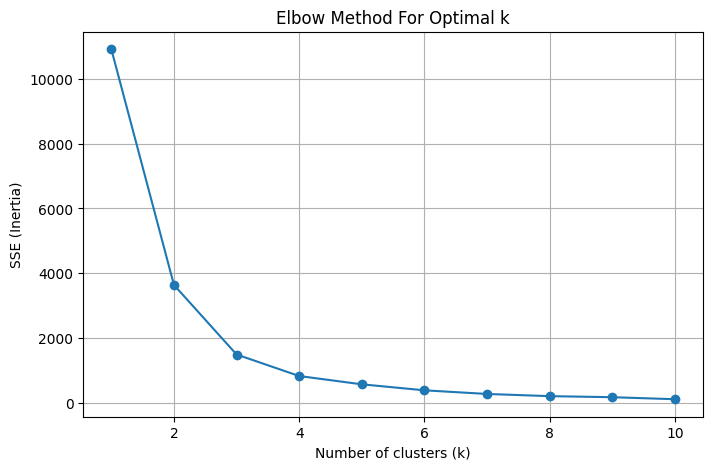

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['Total_Score']]  # ใช้ Total_Score สำหรับการ clustering

sse = []
k_range = range(1, 11)  # ทดสอบตั้งแต่ k=1 ถึง k=10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ = SSE

# วาด Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


k = 3

**Use all kpi for cluster**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# รวม KPI ทั้งหมด
kpi_cols = kpi_positive + kpi_negative
X = df[kpi_cols].copy()

# แทนค่า NaN ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X = X.fillna(X.mean())

# สเกลข้อมูลให้เท่ากัน
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_KPI_Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Faculty', 'PROGRAMNAMECERTIFY',  'Total_Score','Rank','KMeans_KPI_Cluster']].sort_values(by='KMeans_KPI_Cluster'))


                                      Faculty  \
0                         คณะทันตแพทย์ศาสตร์    
1                               คณะนิติศาสตร์   
2   คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร    
3   คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร    
4   คณะบริหารธุรกิจ เศรษฐศาสตร์และการสื่อสาร    
..                                        ...   
12                            คณะมนุษยศาสตร์    
79                          วิทยาลัยนานาชาติ    
72                            คณะเภสัชศาสตร์    
76                          วิทยาลัยนานาชาติ    
80                            คณะศึกษาศาสตร์    

                                   PROGRAMNAMECERTIFY  Total_Score  Rank  \
0               หลักสูตรทันตแพทยศาสตรบัณฑิต ( 6 ปี  )    55.933180  31.0   
1                   หลักสูตรนิติศาสตรบัณฑิต ( 4 ปี  )    55.952381  30.0   
2   หลักสูตรบริหารธุรกิจบัณฑิต สาขาวิชาบริหารธุรกิ...    62.653610  12.0   
3                       หลักสูตรบัญชีบัณฑิต ( 4 ปี  )    63.018433   9.0   
4   หลักสูตรศิลปศาสตรบัณฑิต สาข

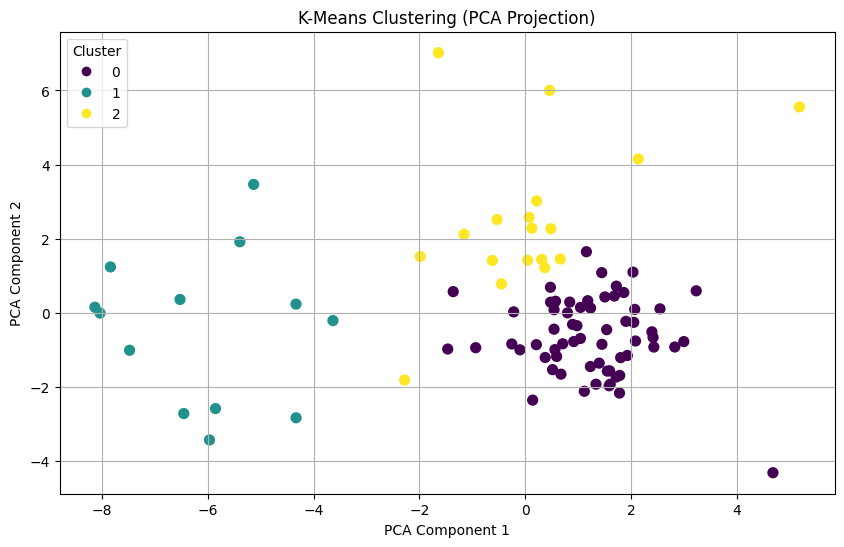

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ลดมิติจากหลาย KPI เหลือ 2 มิติด้วย PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# เพิ่มค่า PCA ลงใน DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# วาด scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['KMeans_KPI_Cluster'], cmap='viridis', s=50)

# เพิ่มคำอธิบายกลุ่ม
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (PCA Projection)")
plt.grid(True)
plt.show()


#Ananlysis Cluster

ค่าเฉลี่ย KPI ตาม **Cluster**

In [ ]:
# คำนวณค่าเฉลี่ยของ KPI ตาม Cluster
cluster_kpi_means = df.groupby('KMeans_KPI_Cluster')[kpi_cols].mean()

# แสดงผลแบบตาราง
print(cluster_kpi_means.T)

KMeans_KPI_Cluster                  0         1         2
LUR2562                      1.265119  0.015385  1.109907
LUR2563                      1.277873  0.019487  1.216319
LUR2564                      1.223175  0.389414  1.107546
LUR2565                      1.042450  0.445073  0.975926
LUR2566                      1.056099  0.835128  0.838889
LUR2567                      0.927578  0.898681  0.847963
Growth_Rate2563              0.035241 -0.076923  0.154476
Growth_Rate2564              0.005030  0.217949 -0.061865
Growth_Rate2565             -0.108923 -0.027274  0.020554
Growth_Rate2566              0.076640  0.574544  0.088412
Growth_Rate2567             -0.132894  0.466210  0.044969
Retention_Rate2562           0.910488  0.076923  0.805006
Retention_Rate2563           0.904935  0.129906  0.742917
Retention_Rate2564           0.864130  0.330338  0.691026
Retention_Rate2565           0.896346  0.647653  0.759170
Retention_Rate2566           0.864838  0.771601  0.701253
Graduation Rat

In [ ]:
# รวมค่าเฉลี่ย KPI แต่ละหมวด
df['LUR_avg'] = df[[f'LUR256{i}' for i in range(2, 8)]].mean(axis=1)
df['Dropout_avg'] = df[[f'Dropout Rate 256{i}' for i in range(2, 8)]].mean(axis=1)
df['Retention_avg'] = df[[f'Retention_Rate256{i}' for i in range(2, 7)]].mean(axis=1)
df['Graduation_avg'] = df[[f'Graduation Rate256{i}' for i in range(2, 5)]].mean(axis=1)
df['OnTimeGrad_avg'] = df[[f'On-time_Graduation_Rate256{i}' for i in range(2, 5)]].mean(axis=1)
df['Growth_avg'] = df[[f'Growth_Rate256{i}' for i in range(3, 8)]].mean(axis=1)


In [ ]:
# รายชื่อคอลัมน์ KPI รวม
kpi_summary_cols = [
    'LUR_avg', 'Dropout_avg', 'Retention_avg',
    'Graduation_avg', 'OnTimeGrad_avg', 'Growth_avg'
]

# คำนวณค่าเฉลี่ยตาม Cluster
cluster_summary = df.groupby('KMeans_KPI_Cluster')[kpi_summary_cols].mean().T

# แสดงผล
print(cluster_summary)


KMeans_KPI_Cluster         0         1         2
LUR_avg             1.132049  0.433861  1.016092
Dropout_avg         0.093739  0.145223  0.307233
Retention_avg       0.888147  0.391284  0.739874
Graduation_avg      0.818395  0.579944  0.681925
OnTimeGrad_avg      0.885151  0.248650  0.816721
Growth_avg         -0.024981  0.230901  0.049309


In [ ]:
# แสดงผลเป็นตารางสวยงาม
styled = cluster_summary.style\
    .format("{:.2f}")\
    .background_gradient(cmap='Blues', axis=1)\
    .set_caption("ค่าเฉลี่ย KPI รวมตาม KMeans_KPI_Cluster")

styled


KMeans_KPI_Cluster,0,1,2
LUR_avg,1.13,0.43,1.02
Dropout_avg,0.09,0.15,0.31
Retention_avg,0.89,0.39,0.74
Graduation_avg,0.82,0.58,0.68
OnTimeGrad_avg,0.89,0.25,0.82
Growth_avg,-0.02,0.23,0.05


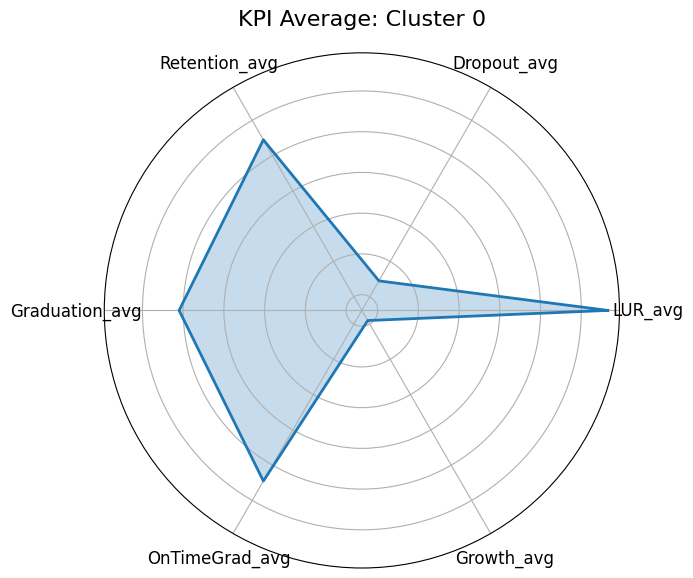

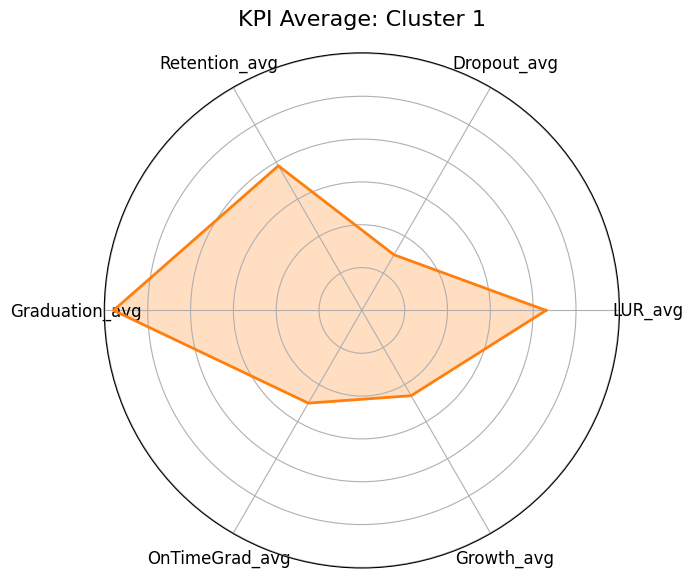

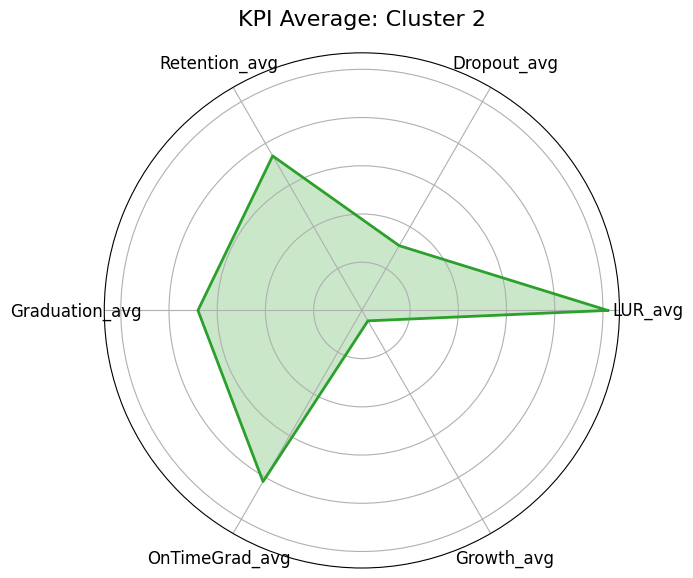

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ข้อมูล KPI สรุปเฉลี่ยตาม Cluster
cluster_summary = {
    'KMeans_KPI_Cluster': ['0', '1', '2'],
    'LUR_avg': [1.13, 0.43, 1.02],
    'Dropout_avg': [0.09, 0.15, 0.31],
    'Retention_avg': [0.89, 0.39, 0.74],
    'Graduation_avg': [0.82, 0.58, 0.68],
    'OnTimeGrad_avg': [0.89, 0.25, 0.82],
    'Growth_avg': [-0.02, 0.23, 0.05]
}

# สร้าง DataFrame
df_cluster = pd.DataFrame(cluster_summary)
df_cluster.set_index('KMeans_KPI_Cluster', inplace=True)

# รายการ KPI
labels = df_cluster.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # วนกลับจุดเริ่มต้น

# สีสำหรับแต่ละ Cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# วาดกราฟแยกแต่ละ Cluster
for i, cluster in enumerate(df_cluster.index):
    values = df_cluster.loc[cluster].tolist()
    values += values[:1]  # ปิด loop กราฟ

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    ax.plot(angles, values, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

    # แก้ไขการแสดง Label ให้ไม่เบี้ยว
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.tick_params(axis='x', pad=10)

    ax.set_yticklabels([])  # ไม่แสดงตัวเลขรอบวง
    ax.set_title(f"KPI Average: Cluster {cluster}", fontsize=16, pad=20)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
df.to_excel("kpi_program_with_K-Means.xlsx", index=False)